In [1]:
# %pip install folium
# %pip install ipyleaflet
# %pip install pyproj
# %pip install requests tqdm
# %pip install numpy
# %pip install pillow
# %pip install -U matplotlib

In [1]:
# Internal modules
import pprint
import math
from process_rectangle import rectangle_to_aerial

# External modules
from ipyleaflet import Map, GeomanDrawControl
from pyproj import Transformer
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Define some setup values for the map
center = (52.104635, 5.045751) # Around Utrecht
zoom = 14 # Default zoom level
scroll_wheel_zoom = True # Allow zooming in with mouse

# Create map
m = Map(center=center, zoom=zoom, scroll_wheel_zoom=scroll_wheel_zoom)

# Create draw control to allow user to create rectangles.
draw_control = GeomanDrawControl()
draw_control.polyline =  {} # Empty dict disables drawing the chosen thing.
draw_control.polygon = {}
draw_control.circlemarker = {}
draw_control.rectangle = {
    "pathOptions": {
        "fillColor": "#fca45d",
        "color": "#000000",
        "fillOpacity": 0
    }
}

# Disable some unneeded map controls
draw_control.edit = False
draw_control.drag = False
draw_control.cut = False
draw_control.remove = False
draw_control.rotate = False

# Define an event handler for when a rectangle is drawn
def handle_draw(event, action, geo_json):
    coordinates = geo_json[0]["geometry"]["coordinates"][0]
    coordinates.pop(-1) # Remove the last coordinate, which is a duplicate of the first one.
    global rectangle
    rectangle = coordinates

# Define rectangle to get drawn rectangle's coordinates
rectangle = None

# Attach the event handler to the draw control
draw_control.on_draw(handle_draw)
m.add(draw_control)

Map(center=[52.104635, 5.045751], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

<b><ins>Draw a rectangle before continuing</ins></b>

downloading tile 1/100
downloading tile 2/100
downloading tile 3/100
downloading tile 4/100
downloading tile 5/100
downloading tile 6/100
downloading tile 7/100
downloading tile 8/100
downloading tile 9/100
downloading tile 10/100
downloading tile 9/100
downloading tile 10/100
downloading tile 11/100
downloading tile 12/100
downloading tile 13/100
downloading tile 14/100
downloading tile 15/100
downloading tile 16/100
downloading tile 17/100
downloading tile 18/100
downloading tile 17/100
downloading tile 18/100
downloading tile 19/100
downloading tile 20/100
downloading tile 21/100
downloading tile 22/100
downloading tile 23/100
downloading tile 24/100
downloading tile 25/100
downloading tile 26/100
downloading tile 25/100
downloading tile 26/100
downloading tile 27/100
downloading tile 28/100
downloading tile 29/100
downloading tile 30/100
downloading tile 31/100
downloading tile 32/100
downloading tile 33/100
downloading tile 34/100
downloading tile 33/100
downloading tile 34/100
do

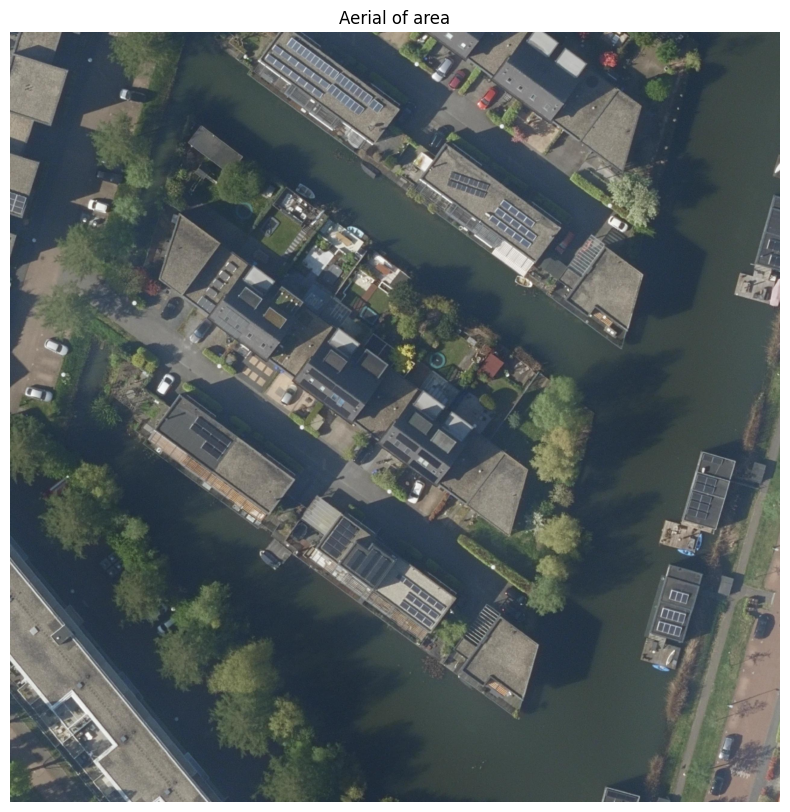

In [3]:
# Create an earial picture of the drawn polygon
aerial_tif = rectangle_to_aerial(rectangle)

# Display the .tif    
img = Image.open(aerial_tif)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.title("Aerial of area")
plt.show()

1. Gebruiker geeft tilesize in meters -> hoogte en breedte tile
2. Gebruiker geeft tile overlap in meters -> overlap tussen tiles
3. Gebruiker geeft zoomniveau -> Gebruik dit om m/pixel te bereken.
4. Convert alle inputs van meters naar pixels adhv m/pixel.